In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
#Load dataset
dataset=pd.read_csv("/content/daily_csv.csv")
dataset.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [ ]:
#Perform missing data check
dataset.isnull().sum()

Date     0
Price    1
dtype: int64

In [ ]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day

In [ ]:
dataset

,Date,Price,year,month,day
0,1997-01-07,3.82,1997,1,7
1,1997-01-08,3.80,1997,1,8
2,1997-01-09,3.61,1997,1,9
3,1997-01-10,3.92,1997,1,10
4,1997-01-13,4.00,1997,1,13
...,...,...,...,...,...
5948,2020-08-26,2.52,2020,8,26
5949,2020-08-27,2.52,2020,8,27
5950,2020-08-28,2.46,2020,8,28
5951,2020-08-31,2.30,2020,8,31


In [ ]:
dataset.drop('Date', axis=1, inplace=True)

In [ ]:
dataset.isnull().any()

Price     True
year     False
month    False
day      False
dtype: bool

In [ ]:
dataset.isnull().sum()

Price    1
year     0
month    0
day      0
dtype: int64

In [ ]:
dataset['Price'].fillna(dataset['Price'].mean(),inplace=True)

In [ ]:
dataset.isnull().any()

Price    False
year     False
month    False
day      False
dtype: bool

No handles with labels found to put in legend.


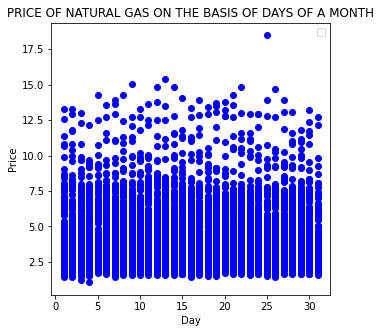

In [ ]:
fig=plt.figure(figsize=(5,5))
plt.scatter(dataset['day'],dataset['Price'],color='blue')
#Set the label for the x-axis.
plt.xlabel('Day')
#Set the label for the y-axis.
plt.ylabel('Price')
#Set a title for the axes.
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
#Place a legend on the axes.
plt.legend()

No handles with labels found to put in legend.


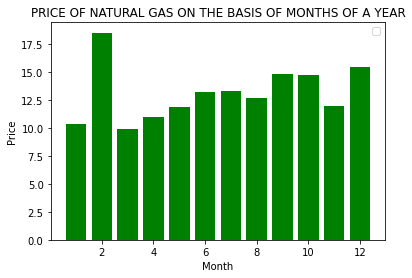

In [ ]:
plt.bar(dataset['month'],dataset['Price'],color='green')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

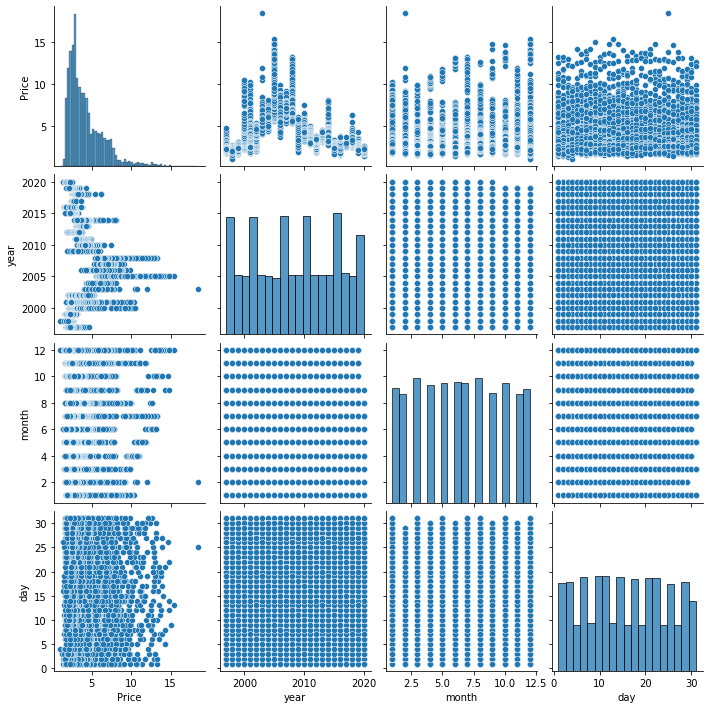

In [ ]:
import seaborn as sns
sns.pairplot(dataset)
plt.show()

In [ ]:
x=dataset.iloc[:,1:4].values #inputs
y=dataset.iloc[:,0:1].values #output price only

In [ ]:
x

array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2020,    8,   28],
       [2020,    8,   31],
       [2020,    9,    1]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
#fitting the model or training the model
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=dtr.predict(x_test)
y_pred

array([2.29, 3.24, 1.8 , ..., 3.42, 4.9 , 2.66])

In [ ]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
accuracy=r2_score(y_test,y_pred)
accuracy

0.9770612787436989

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.3296419450293818


For Prediction

In [ ]:
y_p=dtr.predict([[2022,3,30]])
y_p

array([1.65])